#### Explanation:
1. str.split(',', expand=True): This splits the entries in the Data collections column by commas. If a sample is part of multiple collections, it will create multiple columns.
2. stack(): Flattens the DataFrame so that each individual data collection gets its own row.
3. value_counts(): Counts how many times each data collection appears across all samples.
4. Bar Chart Visualization: A bar chart shows how many samples are in each data collection.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = r"E:\Data Analytics\Genome Sample\cleaned_genome_sample.xlsx"
df = pd.read_excel(file_path, header=1)

In [5]:
df.head()

,Sample name,Sex,Biosample ID,Population code,Population name,Superpopulation code,Superpopulation name,Population elastic ID,Data collections
0,HG00098,male,SAME123272,GBR,British,EUR,European Ancestry,GBR,"1000 Genomes on GRCh38,1000 Genomes phase 3 re..."
1,HG00101,male,SAME125153,GBR,British,EUR,European Ancestry,GBR,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,HG00459,male,SAME125269,CHS,Southern Han Chinese,EAS,East Asian Ancestry,CHS,"1000 Genomes 30x on GRCh38,1000 Genomes phase ..."
3,HG00473,female,SAME123338,CHS,Southern Han Chinese,EAS,East Asian Ancestry,CHS,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,HG00478,male,SAME123335,CHS,Southern Han Chinese,EAS,East Asian Ancestry,CHS,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


In [7]:
# Split the data collection columns by comma
data_collections = df['Data collections'].str.split(',', expand=True)

In [9]:
flattened_collections = data_collections.stack().reset_index(drop=True)

In [11]:
data_collection_counts = flattened_collections.value_counts()

In [13]:
print(data_collection_counts)

1000 Genomes 30x on GRCh38                          3202
1000 Genomes phase 3 release                        3115
1000 Genomes on GRCh38                              2709
1000 Genomes phase 1 release                        1182
Gambian Genome Variation Project (GRCh38)            518
Geuvadis                                             465
Gambian Genome Variation Project (GRCh37)            400
90 Han Chinese high coverage genomes                  90
Human Genome Structural Variation Consortium          73
 Phase 2                                              44
 Phase 3                                              29
Simons Genome Diversity Project                       24
The Human Genome Structural Variation Consortium       9
Illumina Platinum pedigree                             6
Name: count, dtype: int64


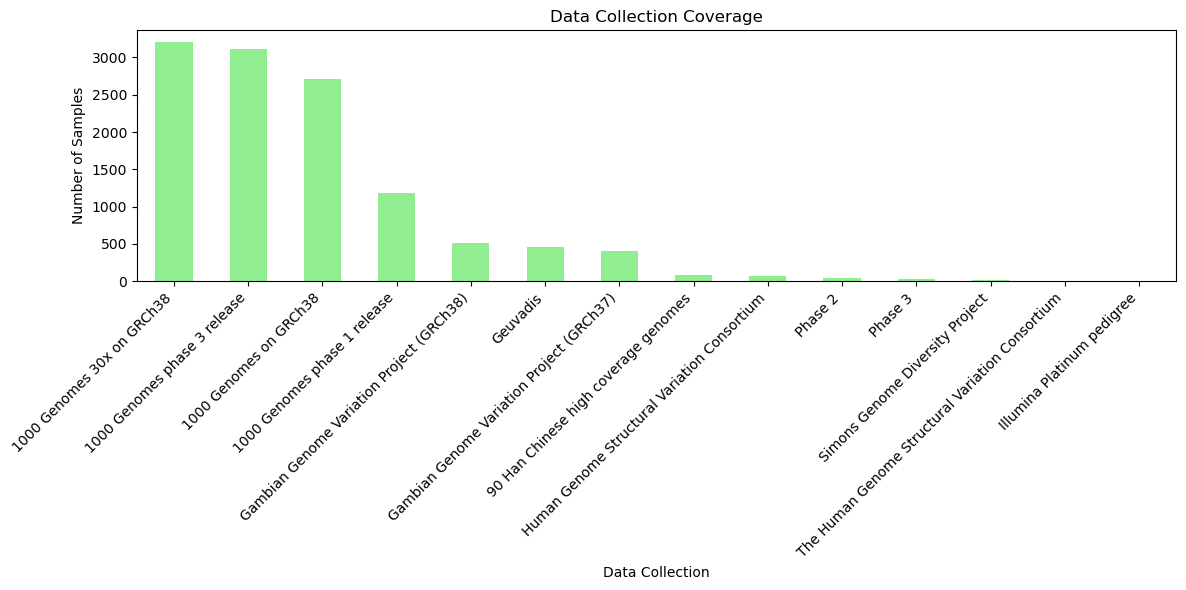

In [15]:
# Visualise
plt.figure(figsize=(12,6))
data_collection_counts.plot(kind='bar', color='lightgreen')
plt.title('Data Collection Coverage')
plt.xlabel('Data Collection')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

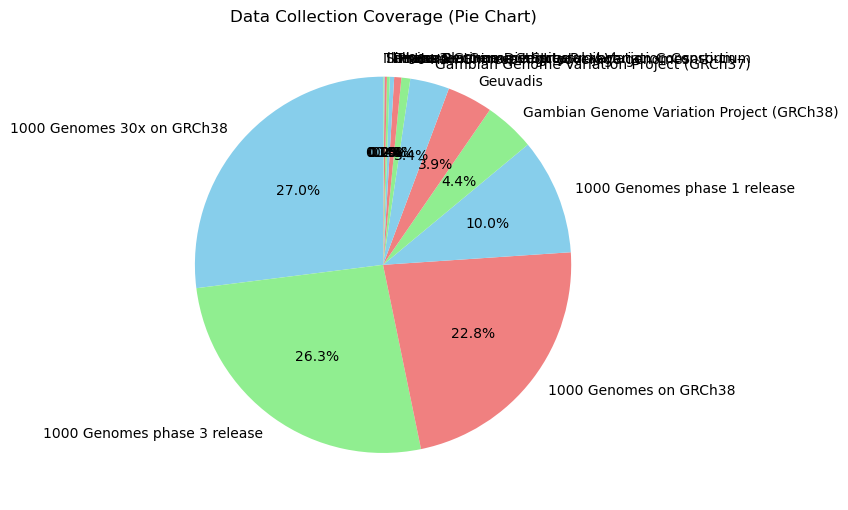

In [18]:
# Pie chart
plt.figure(figsize=(8, 8))
data_collection_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Data Collection Coverage (Pie Chart)')
plt.ylabel('')  # Hide the y-label for pie chart
plt.tight_layout()
plt.show()